<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

In [1]:
# parse news list page
import requests
from bs4 import BeautifulSoup

''' Replace the URL to your table here'''
url = 'https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/'

url_2 = 'https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/'

h = {
    'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 \
    (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'

}



### Gold News Crawler

In [2]:
import pandas as pd
import time
from datetime import datetime

title = []
description = []
datetime1 = []
category = []
agency = []
page = 1
aa = 1 
flag = 0

while(1):
    response = requests.get(url + str(page) + '/',{'headers' : h})
    
    soup = BeautifulSoup(response.text, 'html.parser')
    links = soup.select('#news-list-inner > div > div')


    for content in links:
        if content.find('span',{'class' : "news-article-tag" }) is not None:
            agency.append(content.find('span',{'class' : "news-article-tag" }).text)
        else:
            continue
        title.append(content.h2.text[1:-1])
        description.append(content.find('span',{'class' : "news-article-description" }).text[1:-1])
        datetime1.append(content.time['datetime'])
        aa = content.time['datetime']
        category.append(content.a.text)
        
    if flag==0 and len(title)>500:
        d = (datetime.strptime(aa, '%Y-%m-%d %H:%M:%S')).date()-pd.Timedelta(days=1)
        flag =1
    if flag:
        if str(d) > aa:
            break
    page+=1

df = pd.DataFrame({'title':title, 'description':description,\
                    'datetime' :datetime1, 'category': category, 'agency':agency  })
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
min_time = df.datetime.min().date()

In [3]:
df

,title,description,datetime,category,agency
0,دلیلی برای افزایش قیمت طلا وجود ندارد,تحلیلگران معتقدند: کاهش ارزش دلار و بازدهی پای...,2022-10-28 10:46:18,اخبار طلا و سکه,سایت طلا
1,طلا می‌تواند جایگاه از دست رفته را بازگرداند؟,قیمت طلا امروز جمعه افزایش یافت، در حالی که سر...,2022-10-28 10:46:16,اخبار طلا و سکه,نبض بازار
2,نوسان قیمت حباب سکه امامی/ حباب در بازار سکه ا...,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-10-28 09:51:28,اخبار طلا و سکه,نبض بازار
3,وضعیت قیمت سکه پارسیان در معاملات امروز ۶ آبان...,بروزترین قیمت سکه پارسیان در انواع سوت با عیار...,2022-10-28 09:46:08,اخبار طلا و سکه,نبض بازار
4,۳ دلیل برای خریدن آیپد ۱۰ (و ۲ دلیل برای نخریدن),,2022-10-27 22:46:08,اخبار طلا و سکه,دیجی کالا مگ
...,...,...,...,...,...
537,وضعیت حباب در بازار سکه امروز ۹ مهر ۱۴۰۱ + جدول,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-10-01 10:11:41,اخبار طلا و سکه,نبض بازار
538,تست هوش؛ 6 اختلاف میان این دو تصویر آقای بامزه...,به گزارش سایت طلا، اگر فکر می کنید چشمانی همچو...,2022-10-01 10:01:24,اخبار طلا و سکه,سایت طلا
539,پیش بینی قیمت طلا در روزهای آتی,قیمت طلا عکس‌العملی نسبت‌به امضای قرارداد پوتی...,2022-10-01 09:46:26,اخبار طلا و سکه,سایت طلا
540,قیمت سکه اوج گرفت/پیش بینی بازار سکه 9 مهر 1401,اقتصادنیوز: قیمت سکه دیروز در بازار پشت خطی به...,2022-10-01 09:46:24,اخبار طلا و سکه,اقتصاد نیوز


### Currency News Crawler

In [4]:
title = []
description = []
datetime = []
category = []
agency = []
page = 1

while(1):
    
    response = requests.get(url_2 + str(page) + '/',{'headers' : h})
    soup = BeautifulSoup(response.text, 'html.parser')
    links = soup.select('#news-list-inner > div > div')


    for content in links:
        if content.find('span',{'class' : "news-article-tag" }) is not None:
            agency.append(content.find('span',{'class' : "news-article-tag" }).text)
        else:
            continue
            #agency.append(content.find('span',{'class' : "news-article-tag" }))
        title.append(content.h2.text[1:-1])
        description.append(content.find('span',{'class' : "news-article-description" }).text[1:-1])
        mtime = content.time['datetime']
        datetime.append(mtime)
        category.append(content.a.text)
        
    page+=1
    if mtime<str(d) and len(title)>500:
        break

df_2 = pd.DataFrame({'title':title, 'description':description,\
                    'datetime' :datetime, 'category': category, 'agency':agency  })
df_2['datetime'] = pd.to_datetime(df_2['datetime'], format='%Y-%m-%d')

In [5]:
df_2

,title,description,datetime,category,agency
0,رئیس مجلس قانون مدیریت داده‌ها و اطلاعات ملی ر...,,2022-10-28 10:46:26,اخبار ارزی,راه پرداخت
1,بیش از ۳ میلیارد دلار تهاتر کالایی در یک سال گ...,تهران- ایرنا- معاون وزیر صنعت، معدن و تجارت با...,2022-10-28 10:31:31,اخبار ارزی,ایرنا
2,قیمت دلار، قیمت یورو و قیمت پوند امروز جمعه ۶ ...,قیمت دلار، یورو، پوند و سایر ارز‌ها امروز جمعه...,2022-10-28 10:11:33,اخبار ارزی,اقتصاد 24
3,قیمت بیت کوین و ارز‌های دیجیتال امروز جمعه ۶ آ...,قیمت بیت کوین، اتریوم، تتر و سایر ارز‌های دیجی...,2022-10-28 10:11:28,اخبار ارزی,اقتصاد 24
4,رشد ۱۳ درصدی صادرات غیرنفتی در نیمه اول امسال,صادرات غیرنفتی در نیمه اول سال به بیش از ۴۲ می...,2022-10-28 09:46:13,اخبار ارزی,خبرگزاری دانشجو
...,...,...,...,...,...
1320,پیش بینی قیمت دلار یکشنبه ۱۰ مهر ۱۴۰۱ / حرکت د...,امروز دلار در بازار آزاد مانند ۲ روز پیش رشد ق...,2022-10-01 17:06:39,اخبار ارزی,نبض بازار
1321,بازار دلار دوباره رنگ و بوی تحریم گرفت,همدلی نوشت: مهم‌ترین بازارهای پایتخت دوباره رن...,2022-10-01 17:01:57,اخبار ارزی,خبر آنلاین
1322,روز آرام رمزارزها/ نوسان بیت کوین در کانال 190...,اقتصادنیوز: بازار ارزهای دیجیتال امروز نسبتا م...,2022-10-01 16:46:23,اخبار ارزی,اقتصاد نیوز
1323,جدیدترین گزارش از تغییرات نرخ ارز | دلار و یور...,بانک مرکزی متوسط قیمت دلار و یورو در پنج ماهه ...,2022-10-01 16:41:36,اخبار ارزی,همشهری آنلاین


### Cleaning data and fix formats

In [6]:
df.memory_usage(deep=True)

Index             128
title           95642
description    182246
datetime         4336
category        60704
agency          55022
dtype: int64

In [7]:
df['category'] = df['category'].astype('category')
df['agency'] = df['agency'].astype('category')
df.memory_usage(deep=True)

Index             128
title           95642
description    182246
datetime         4336
category          790
agency           4803
dtype: int64

In [8]:
df_2['category'] = df_2['category'].astype('category')
df_2['agency'] = df_2['agency'].astype('category')

In [9]:
df

,title,description,datetime,category,agency
0,دلیلی برای افزایش قیمت طلا وجود ندارد,تحلیلگران معتقدند: کاهش ارزش دلار و بازدهی پای...,2022-10-28 10:46:18,اخبار طلا و سکه,سایت طلا
1,طلا می‌تواند جایگاه از دست رفته را بازگرداند؟,قیمت طلا امروز جمعه افزایش یافت، در حالی که سر...,2022-10-28 10:46:16,اخبار طلا و سکه,نبض بازار
2,نوسان قیمت حباب سکه امامی/ حباب در بازار سکه ا...,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-10-28 09:51:28,اخبار طلا و سکه,نبض بازار
3,وضعیت قیمت سکه پارسیان در معاملات امروز ۶ آبان...,بروزترین قیمت سکه پارسیان در انواع سوت با عیار...,2022-10-28 09:46:08,اخبار طلا و سکه,نبض بازار
4,۳ دلیل برای خریدن آیپد ۱۰ (و ۲ دلیل برای نخریدن),,2022-10-27 22:46:08,اخبار طلا و سکه,دیجی کالا مگ
...,...,...,...,...,...
537,وضعیت حباب در بازار سکه امروز ۹ مهر ۱۴۰۱ + جدول,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-10-01 10:11:41,اخبار طلا و سکه,نبض بازار
538,تست هوش؛ 6 اختلاف میان این دو تصویر آقای بامزه...,به گزارش سایت طلا، اگر فکر می کنید چشمانی همچو...,2022-10-01 10:01:24,اخبار طلا و سکه,سایت طلا
539,پیش بینی قیمت طلا در روزهای آتی,قیمت طلا عکس‌العملی نسبت‌به امضای قرارداد پوتی...,2022-10-01 09:46:26,اخبار طلا و سکه,سایت طلا
540,قیمت سکه اوج گرفت/پیش بینی بازار سکه 9 مهر 1401,اقتصادنیوز: قیمت سکه دیروز در بازار پشت خطی به...,2022-10-01 09:46:24,اخبار طلا و سکه,اقتصاد نیوز


# crawl data + save into csv file

In [10]:
pd.concat([df, df_2],ignore_index=True).to_csv('./out.csv') 

In [11]:
df_re = pd.read_csv('./out.csv')  

In [12]:
df_re

,Unnamed: 0,title,description,datetime,category,agency
0,0,دلیلی برای افزایش قیمت طلا وجود ندارد,تحلیلگران معتقدند: کاهش ارزش دلار و بازدهی پای...,2022-10-28 10:46:18,اخبار طلا و سکه,سایت طلا
1,1,طلا می‌تواند جایگاه از دست رفته را بازگرداند؟,قیمت طلا امروز جمعه افزایش یافت، در حالی که سر...,2022-10-28 10:46:16,اخبار طلا و سکه,نبض بازار
2,2,نوسان قیمت حباب سکه امامی/ حباب در بازار سکه ا...,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-10-28 09:51:28,اخبار طلا و سکه,نبض بازار
3,3,وضعیت قیمت سکه پارسیان در معاملات امروز ۶ آبان...,بروزترین قیمت سکه پارسیان در انواع سوت با عیار...,2022-10-28 09:46:08,اخبار طلا و سکه,نبض بازار
4,4,۳ دلیل برای خریدن آیپد ۱۰ (و ۲ دلیل برای نخریدن),NaN,2022-10-27 22:46:08,اخبار طلا و سکه,دیجی کالا مگ
...,...,...,...,...,...,...
1862,1862,پیش بینی قیمت دلار یکشنبه ۱۰ مهر ۱۴۰۱ / حرکت د...,امروز دلار در بازار آزاد مانند ۲ روز پیش رشد ق...,2022-10-01 17:06:39,اخبار ارزی,نبض بازار
1863,1863,بازار دلار دوباره رنگ و بوی تحریم گرفت,همدلی نوشت: مهم‌ترین بازارهای پایتخت دوباره رن...,2022-10-01 17:01:57,اخبار ارزی,خبر آنلاین
1864,1864,روز آرام رمزارزها/ نوسان بیت کوین در کانال 190...,اقتصادنیوز: بازار ارزهای دیجیتال امروز نسبتا م...,2022-10-01 16:46:23,اخبار ارزی,اقتصاد نیوز
1865,1865,جدیدترین گزارش از تغییرات نرخ ارز | دلار و یور...,بانک مرکزی متوسط قیمت دلار و یورو در پنج ماهه ...,2022-10-01 16:41:36,اخبار ارزی,همشهری آنلاین


In [13]:
df_re['datetime'] = pd.to_datetime(df_re['datetime'], format='%Y-%m-%d').dt.date
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d').dt.date
df_2['datetime'] = pd.to_datetime(df_2['datetime'], format='%Y-%m-%d').dt.date

## Question 1: Top Agency

In [14]:
df_re.agency.value_counts().head(5)

اقتصاد نیوز      220
نبض بازار        198
اقتصاد آنلاین    155
دیجی کالا مگ     148
سایت طلا         130
Name: agency, dtype: int64

## Question 2: Daily News Trend

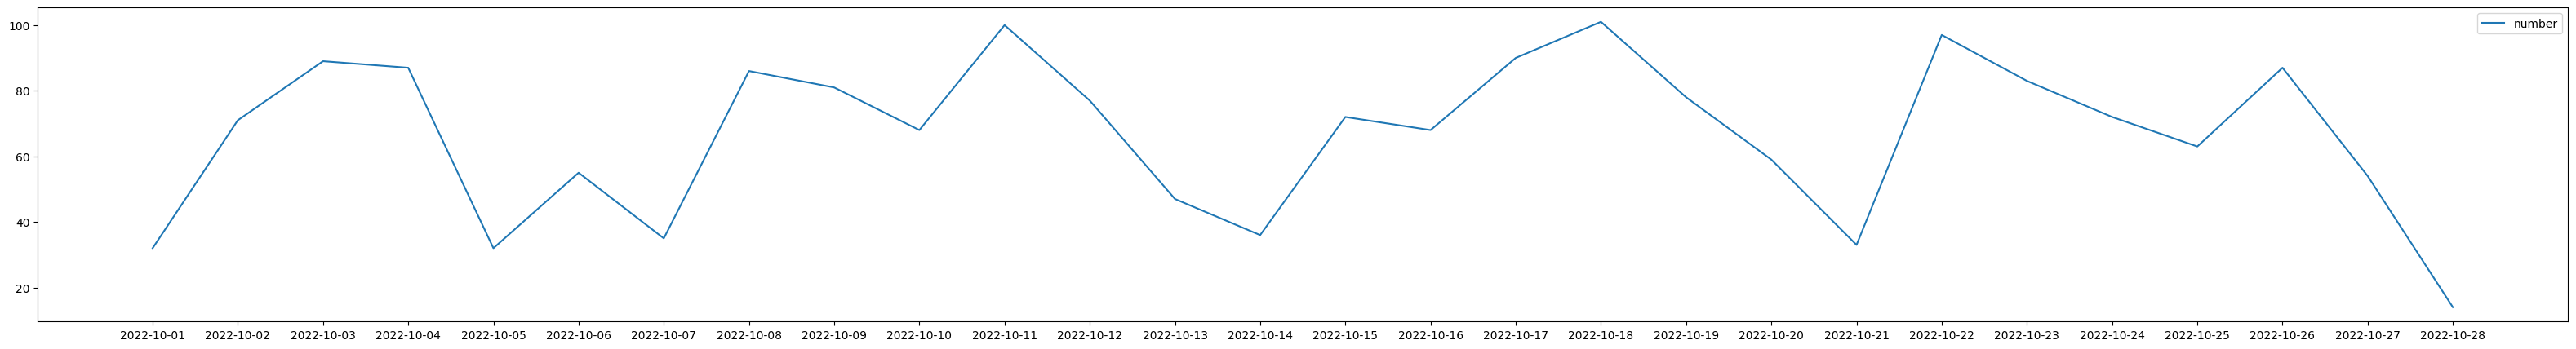

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(40, 5))
plt.plot(df_re.groupby('datetime').size().index.map(str),df_re.groupby('datetime').size(), label='number')
plt.legend()

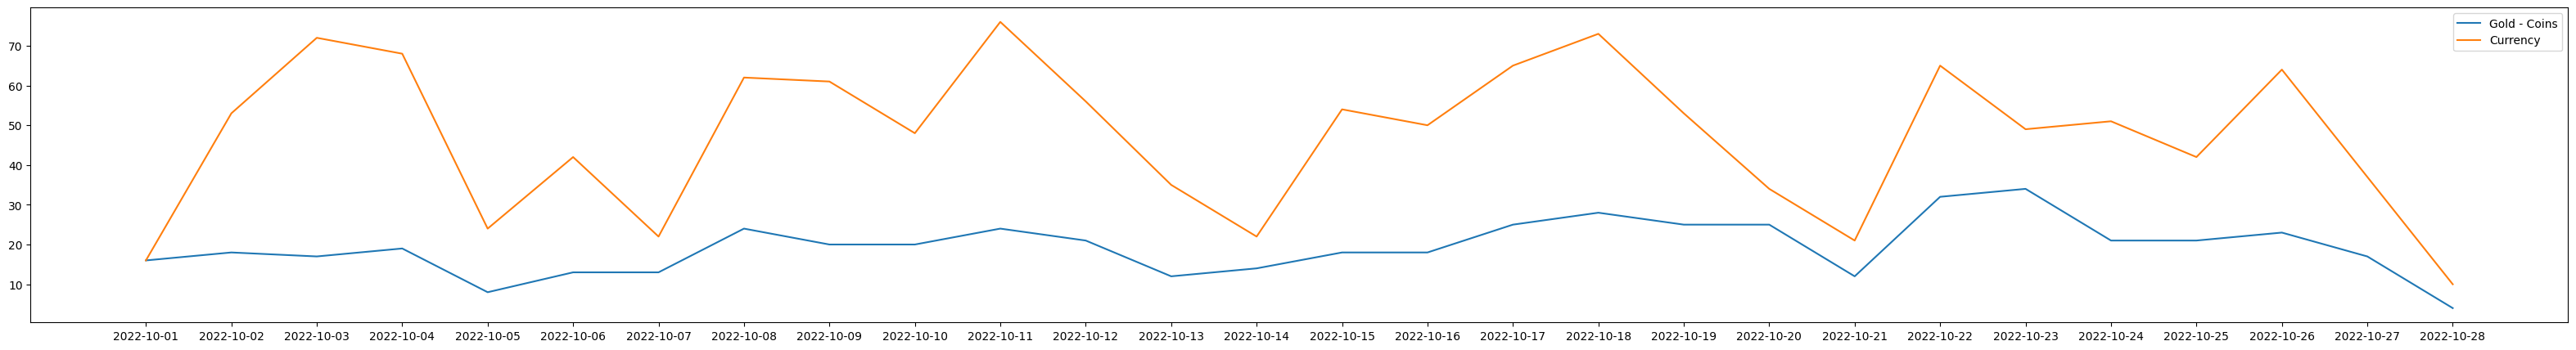

In [29]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(40, 5))
plt.plot(df.groupby('datetime').size().index.map(str), df.groupby('datetime').size(), label='Gold - Coins')
plt.plot(df_2.groupby('datetime').size().index.map(str), df_2.groupby('datetime').size(), label='Currency')
plt.legend()